> mnist 분류

In [1]:
from torch.utils.data import Dataset
import pandas as pd
import torch
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #커널충돌방지코드

In [2]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
    def __len__(self):
        return len(self.data_df)
    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        #정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " +
        str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

In [5]:
mnist_dataset = MnistDataset('C:/vscode/data/mnist_train.csv')

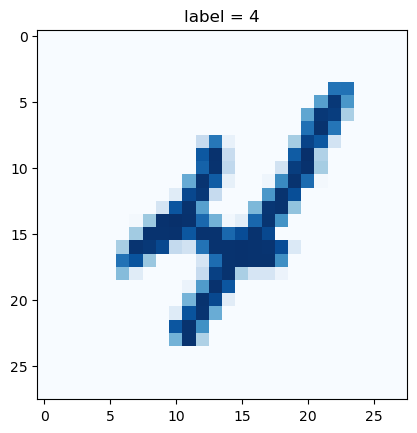

In [6]:
mnist_dataset.plot_image(9)

In [7]:
print(mnist_dataset[100][0])
print(mnist_dataset[100][1][:100])

5
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [3]:
import torch.nn as nn
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [8]:
model = Classifier()
epochs = 4
for i in range(epochs):
    print('epoch', i+1, "/", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset: 
        model.train(image_data_tensor, target_tensor)

epoch 1 / 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
epoch 2 / 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch 3 / 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
epoch 4 / 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000


In [9]:
mnist_test_dataset = MnistDataset('C:/vscode/data/mnist_test.csv')

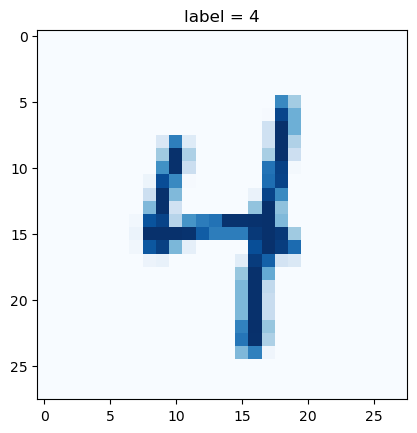

In [10]:
idx = 19
mnist_test_dataset.plot_image(idx)

<AxesSubplot:>

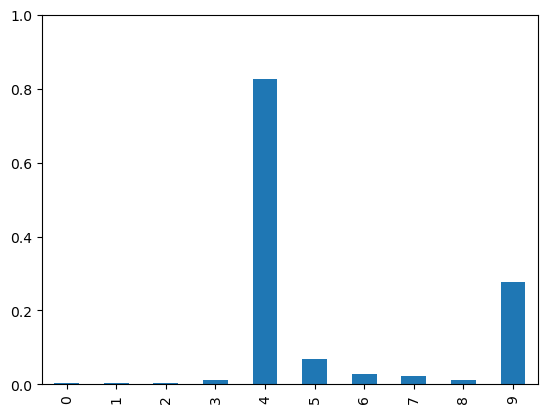

In [11]:
image_data = mnist_test_dataset[idx][1]
output = model.forward(image_data)
pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [12]:
score = 0
items = 0
for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = model.forward(image_data_tensor).detach().numpy()
    if answer.argmax() == label:
        score += 1
    items += 1
print(score, items, score/items)

8808 10000 0.8808


> GAN 적대적 생성모델

In [13]:
import torch
import random

# real 이미지 생성 함수
def generate_real():
    real_data = torch.FloatTensor(
                [random.uniform(0.8, 1.0),
                random.uniform(0.0, 0.2),
                random.uniform(0.8, 1.0),
                random.uniform(0.0, 0.2)])
    return real_data

# random 이미지 생성 함수
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [15]:
import torch.nn as nn
import pandas as pd

# 판별모형
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [16]:
D = Discriminator()
for i in range(10000):
    # real image
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake image
    D.train(generate_random(4), torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


In [17]:
print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.8093496561050415
0.08872891217470169


In [18]:
# 생성모형
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(1, 3),
                nn.Sigmoid(),
                nn.Linear(3, 4),
                nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [19]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6603, 0.4835, 0.5164, 0.3940], grad_fn=<SigmoidBackward0>)

In [20]:
D = Discriminator()
G = Generator()
image_list = []
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # 판별모형 학습(false)
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    # 생성모형 학습
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    if i % 1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy() )

counter =  10000
counter =  20000


In [21]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9590, 0.0322, 0.9302, 0.0385], grad_fn=<SigmoidBackward0>)

In [22]:
# 생성된 패턴
image_list

[array([0.29220724, 0.688177  , 0.5317411 , 0.58231264], dtype=float32),
 array([0.303077 , 0.687327 , 0.5238067, 0.5896687], dtype=float32),
 array([0.3349667 , 0.6717235 , 0.52469873, 0.58068144], dtype=float32),
 array([0.42515177, 0.6103426 , 0.5492663 , 0.5311955 ], dtype=float32),
 array([0.62129164, 0.4290548 , 0.6182009 , 0.392392  ], dtype=float32),
 array([0.80388117, 0.20294684, 0.7170663 , 0.21311706], dtype=float32),
 array([0.88650703, 0.1024001 , 0.8019389 , 0.11614873], dtype=float32),
 array([0.92265546, 0.06452891, 0.8585539 , 0.07503688], dtype=float32),
 array([0.94120795, 0.04716913, 0.893653  , 0.05545247], dtype=float32),
 array([0.952079  , 0.03778998, 0.9157357 , 0.04481357], dtype=float32)]

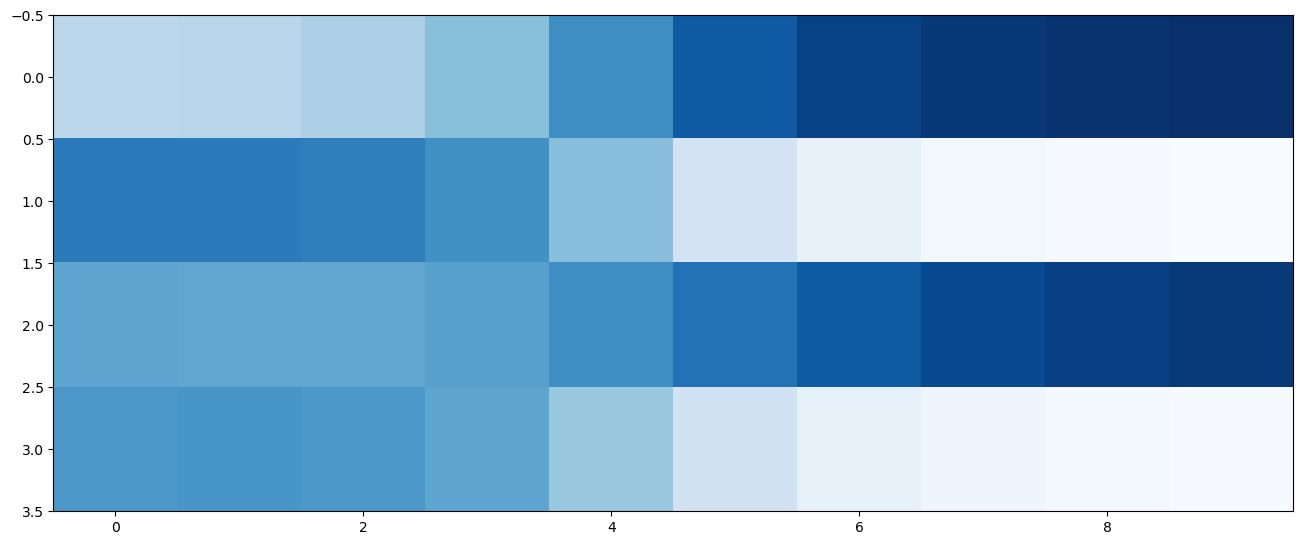

In [23]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
plt.figure(figsize = (16,8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')
plt.show()

> GAN (mnist)

In [24]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch.nn as nn
from torch.utils.data import Dataset
import numpy, random
import pandas as pd
import matplotlib.pyplot as plt

import torch
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [25]:
# dataset class
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
    def __len__(self):
        return len(self.data_df)
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        # image data
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

In [26]:
mnist_dataset = MnistDataset('c:/vscode/data/mnist_train.csv')

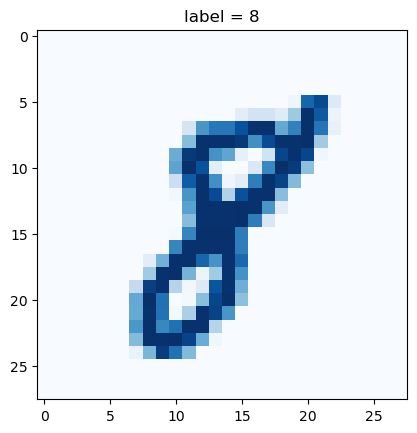

In [27]:
mnist_dataset.plot_image(17)

In [28]:
# 랜덤 이미지 생성 함수
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [29]:
# 판별모형
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(784, 200),
                # 음수이면 기울기 0.02
                nn.LeakyReLU(0.02),
                # 레이어에 대한 정규화
                nn.LayerNorm(200),
                nn.Linear(200, 1),
                nn.Sigmoid()
        )

        # binary cross entropy
        self.loss_function = nn.BCELoss()
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs.to(DEVICE))
        loss = self.loss_function(outputs, targets.to(DEVICE))
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1,
            marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

In [30]:
D = Discriminator().to(DEVICE)
for label, image_data_tensor, target_tensor in mnist_dataset:
    # real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random_image(784), torch.FloatTensor([0.0]))

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


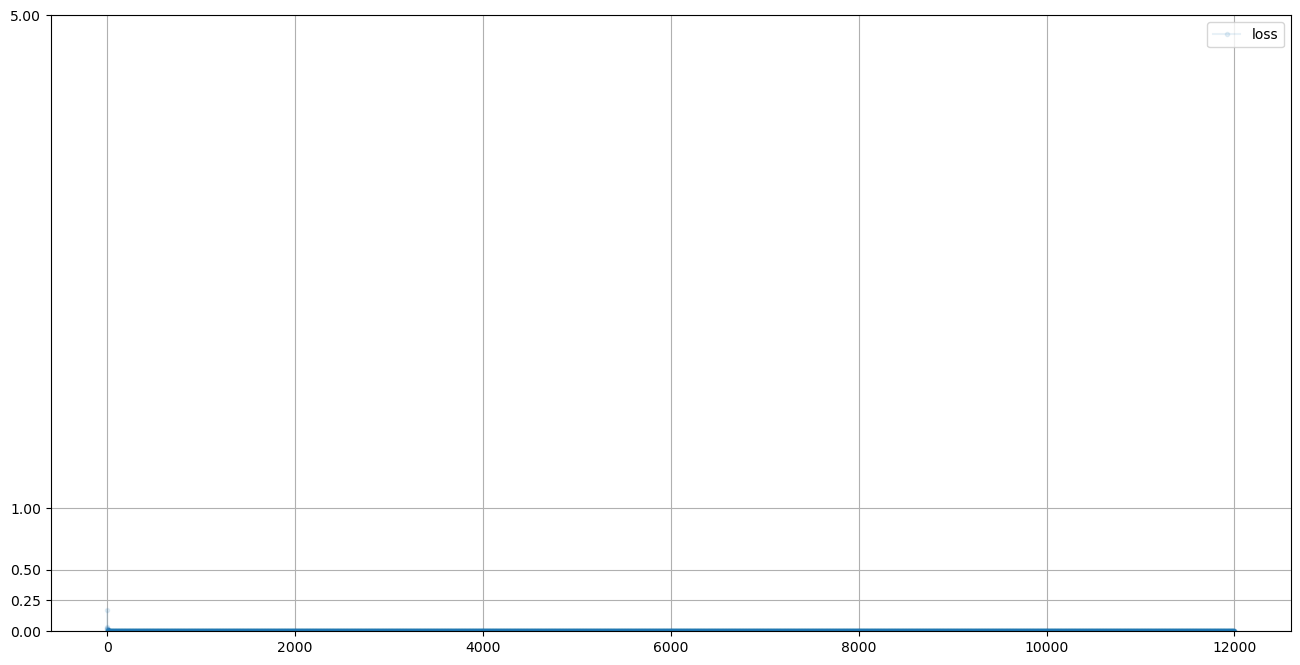

In [31]:
D.plot_progress()

In [32]:
# test real data
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
    print( D.forward( image_data_tensor.to(DEVICE) ).item())
# test fake data
for i in range(4):
    print( D.forward( generate_random_image(784).to(DEVICE)).item() )   

1.0
1.0
1.0
1.0
9.23604335373307e-12
9.601896534816579e-12
8.543427250373714e-12
8.636849915810707e-12


In [33]:
# 생성모델
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(100, 200),
                nn.LeakyReLU(0.02),
                nn.LayerNorm(200),
                nn.Linear(200, 784),
                nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs.to(DEVICE))
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs.to(DEVICE))
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets.to(DEVICE))
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1,
        marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

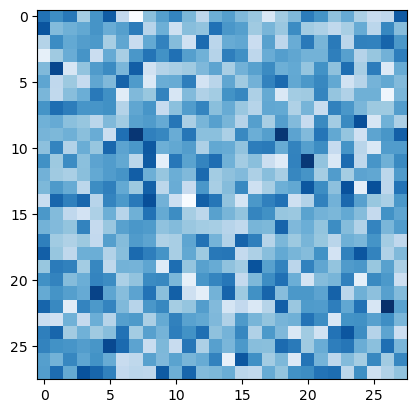

In [34]:
G = Generator().to(DEVICE)
output = G.forward(generate_random_seed(100))
#output = G.forward(generate_random_image(100))
img = output.cpu().detach().numpy().reshape(28,28)
plt.imshow(img, cmap='Blues')
plt.show()

In [ ]:
D = Discriminator().to(DEVICE)
G = Generator().to(DEVICE)
epochs = 4
for epoch in range(epochs):
    print ("epoch = ", epoch + 1)
    
for label, image_data_tensor, target_tensor in mnist_dataset:
    # 판별모형 훈련(true)
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # 판별모형 훈련(false)
    D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    # 생성모형 훈련
    G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))

In [ ]:
print(D.plot_progress()) #판독오차
print(G.plot_progress()) #생성오차

In [ ]:
# torch.save(G,'final_G.h5')

print(G.model[3].weight[0][:10])
print(G.model[3].bias[:10])

> 학습된 모형 불러오기

In [2]:
import torch.nn as nn
import torch
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [4]:
import pandas as pd
# 생성모델
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(100, 200),
                nn.LeakyReLU(0.02),
                nn.LayerNorm(200),
                nn.Linear(200, 784),
                nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs.to(DEVICE))
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs.to(DEVICE))
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets.to(DEVICE))
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1,
        marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

In [5]:
# 모델 불러오기
G=torch.load('C:/vscode/강의자료/파이썬/final_G.h5')
G.to(DEVICE)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): LeakyReLU(negative_slope=0.02)
    (2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=200, out_features=784, bias=True)
    (4): Sigmoid()
  )
)

In [40]:
#학습된 가중치 확인
print(G.model[3].weight[0][:10])
print(G.model[3].bias[:10])

tensor([-0.1824, -0.0151, -0.0939,  0.2924,  0.0319,  0.2362,  0.1372, -0.0187,
        -0.1779, -0.0858], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([-0.3144, -0.2931, -0.3821, -0.3161, -0.3716, -0.3532, -0.3990, -0.2818,
        -0.3520, -0.4434], device='cuda:0', grad_fn=<SliceBackward0>)


In [41]:
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

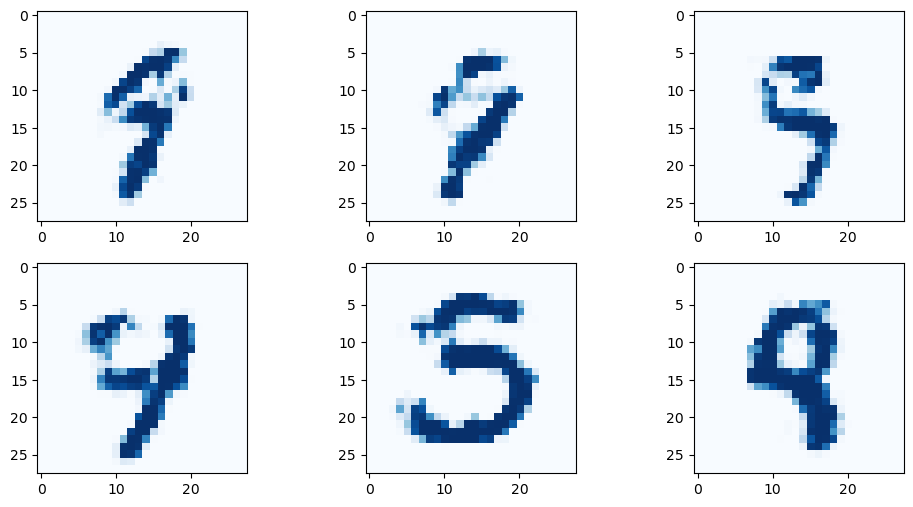

In [42]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
count = 0
f, axarr = plt.subplots(2,3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

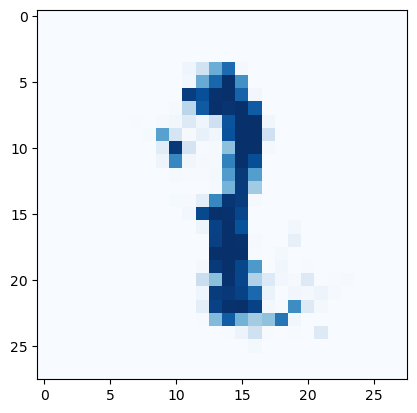

In [43]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.cpu().detach().numpy().reshape(28,28)
plt.imshow(img1, cmap='Blues')
plt.show()

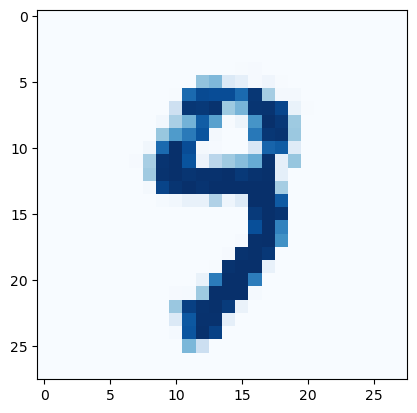

In [44]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.cpu().detach().numpy().reshape(28,28)
plt.imshow(img2, cmap='Blues')
plt.show()

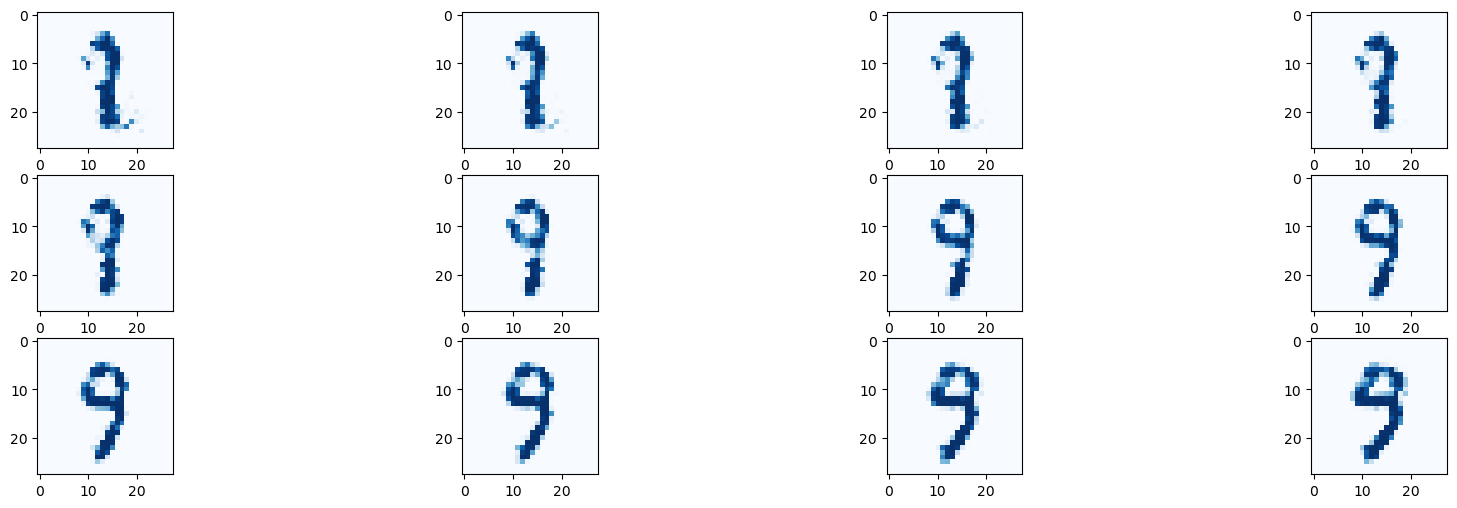

In [45]:
count = 0
f, axarr = plt.subplots(3,4, figsize=(21,6))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1)/11 * count
        output = G.forward(seed)
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        count = count + 1
        pass
    pass

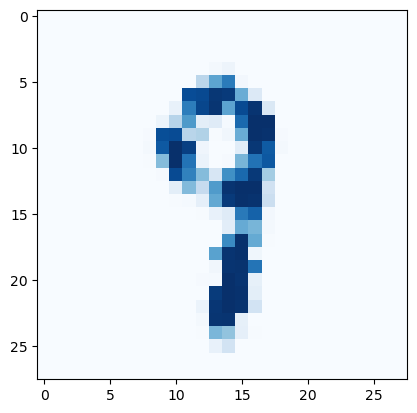

In [46]:
# sum of seeds
seed3 = seed1 + seed2
out3 = G.forward(seed3)
img3 = out3.cpu().detach().numpy().reshape(28,28)
plt.imshow(img3, cmap='Blues')
plt.show()

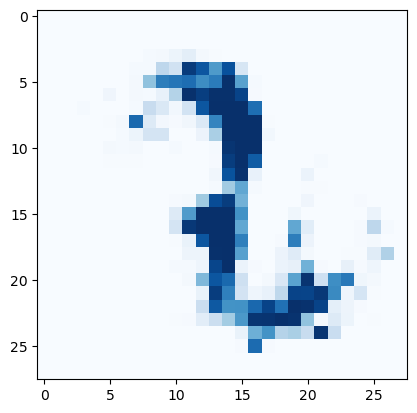

In [47]:
# difference of seeds
seed4 = seed1 - seed2
out4 = G.forward(seed4)
img4 = out4.cpu().detach().numpy().reshape(28,28)
plt.imshow(img4, cmap='Blues')
plt.show()

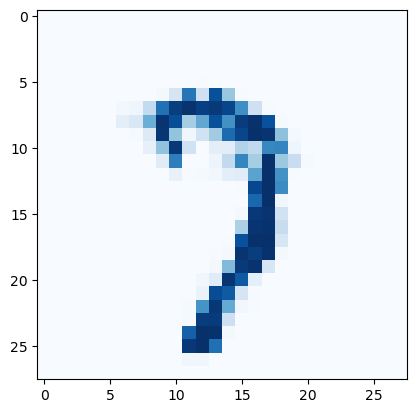

In [48]:
seed4 = seed1 * seed2
out4 = G.forward(seed4)
img4 = out4.cpu().detach().numpy().reshape(28,28)
plt.imshow(img4, cmap='Blues')
plt.show()